In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import requests
import zipfile
from io import BytesIO
from io import StringIO
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler

2023-04-26 12:13:30.826524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:


# Load and preprocess the datasets
def load_and_preprocess_parkinsons():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data'
    df = pd.read_csv(url)
    df = df.drop(['subject#'], axis=1)
    X = df.drop(['motor_UPDRS', 'total_UPDRS'], axis=1).values
    y = df['total_UPDRS'].values
    return X, y

def load_and_preprocess_energy():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
    df = pd.read_excel(url)
    X = df.drop(['Y1', 'Y2'], axis=1).values
    y = df['Y1'].values
    return X, y

# def load_and_preprocess_superconductivity():
#     url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip'
#     df = pd.read_csv(url, compression='zip')
#     X = df.drop(['critical_temp'], axis=1).values
#     y = df['critical_temp'].values
#     return X, y

def load_and_preprocess_superconductivity():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip'
    response = requests.get(url)
    zf = zipfile.ZipFile(BytesIO(response.content))
    df = pd.read_csv(zf.open('train.csv'))
    X = df.drop(['critical_temp'], axis=1).values
    y = df['critical_temp'].values
    return X, y

def load_and_preprocess_forest_fires():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
    df = pd.read_csv(url)
    df = pd.get_dummies(df)
    X = df.drop(['area'], axis=1).values
    y = df['area'].values
    return X, y

def load_and_preprocess_wine_quality():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
    df = pd.read_csv(url, delimiter=';')
    X = df.drop(['quality'], axis=1).values
    y = df['quality'].values
    return X, y

X_parkinsons, y_parkinsons = load_and_preprocess_parkinsons()
X_energy, y_energy = load_and_preprocess_energy()
X_superconductivity, y_superconductivity = load_and_preprocess_superconductivity()
X_forest_fires, y_forest_fires = load_and_preprocess_forest_fires()
X_wine_quality, y_wine_quality = load_and_preprocess_wine_quality()

# Scale the datasets
scaler_parkinsons = StandardScaler().fit(X_parkinsons)
scaler_energy = StandardScaler().fit(X_energy)
scaler_superconductivity = StandardScaler().fit(X_superconductivity)
scaler_forest_fires = StandardScaler().fit(X_forest_fires)
scaler_wine_quality = StandardScaler().fit(X_wine_quality)

X_parkinsons_scaled = scaler_parkinsons.transform(X_parkinsons)
X_energy_scaled = scaler_energy.transform(X_energy)
X_superconductivity_scaled = scaler_superconductivity.transform(X_superconductivity)
X_forest_fires_scaled = scaler_forest_fires.transform(X_forest_fires)
X_wine_quality_scaled = scaler_wine_quality.transform(X_wine_quality)

In [3]:

# Functions and data preprocessing are same as provided code

def run_regression_models(X, y):
    X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)

    regression_models = [
        ('Lasso', Lasso(alpha=0.1)),
        ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('XGBoost', XGBRegressor(n_estimators=100, random_state=42)),
        ('SVR', SVR(kernel='linear')),
        ('k-NN', KNeighborsRegressor(n_neighbors=5)),
        ('AdaBoost', AdaBoostRegressor(n_estimators=100, random_state=42)),
        ('ExtraTrees', ExtraTreesRegressor(n_estimators=100, random_state=42))
    ]

    results = {}
    for name, model in regression_models:
        start_time = time.time()
        model.fit(X_train_all, y_train_all)
        elapsed_time = time.time() - start_time
        y_pred_test = model.predict(X_test_all)
        test_error = mean_squared_error(y_test_all, y_pred_test)
        test_r2 = r2_score(y_test_all, y_pred_test)

        results[name] = {
            'test_mse': test_error,
            'test_r2': test_r2,
            'elapsed_time': elapsed_time
        }

    return results

# Datasets dictionary and loop for running models are the same as the provided code


In [4]:
datasets = {
    'Parkinsons': (X_parkinsons_scaled, y_parkinsons),
    'Energy Efficiency': (X_energy_scaled, y_energy),
    'Superconductivity': (X_superconductivity_scaled, y_superconductivity),
    'Forest Fires': (X_forest_fires_scaled, y_forest_fires),
    'Wine Quality': (X_wine_quality_scaled, y_wine_quality)
}

for dataset_name, (X, y) in datasets.items():
    print(f"\n{dataset_name}:")
    results = run_regression_models(X, y)
    for model_name, metrics in results.items():
        print(f"{model_name}: Test MSE: {metrics['test_mse']:.4f}, Test R2: {metrics['test_r2']:.4f}")


Parkinsons:
Lasso: Test MSE: 93.4615, Test R2: 0.1566
RandomForest: Test MSE: 2.5748, Test R2: 0.9768
XGBoost: Test MSE: 4.8244, Test R2: 0.9565
SVR: Test MSE: 96.6305, Test R2: 0.1280
k-NN: Test MSE: 39.4418, Test R2: 0.6441
AdaBoost: Test MSE: 69.1746, Test R2: 0.3758
ExtraTrees: Test MSE: 2.2313, Test R2: 0.9799

Energy Efficiency:
Lasso: Test MSE: 9.9394, Test R2: 0.9046
RandomForest: Test MSE: 0.2444, Test R2: 0.9977
XGBoost: Test MSE: 0.1442, Test R2: 0.9986
SVR: Test MSE: 9.7768, Test R2: 0.9062
k-NN: Test MSE: 5.3575, Test R2: 0.9486
AdaBoost: Test MSE: 4.0551, Test R2: 0.9611
ExtraTrees: Test MSE: 0.2564, Test R2: 0.9975

Superconductivity:
Lasso: Test MSE: 328.8063, Test R2: 0.7143
RandomForest: Test MSE: 81.4574, Test R2: 0.9292
XGBoost: Test MSE: 89.1691, Test R2: 0.9225
SVR: Test MSE: 321.2115, Test R2: 0.7209
k-NN: Test MSE: 108.9181, Test R2: 0.9054
AdaBoost: Test MSE: 408.6658, Test R2: 0.6450
ExtraTrees: Test MSE: 78.7690, Test R2: 0.9316

Forest Fires:
Lasso: Test MS

In [5]:
def plot_mse(datasets, title):
    model_names = list(datasets[list(datasets.keys())[0]].keys())
    dataset_names = list(datasets.keys())
    mse_values = []

    for model_name in model_names:
        model_mse = [datasets[dataset_name][model_name]['mse'] for dataset_name in dataset_names]
        mse_values.append(model_mse)

    fig, ax = plt.subplots()
    x = np.arange(len(dataset_names))
    bar_width = 0.2

    for i in range(len(model_names)):
        ax.bar(x + i * bar_width, mse_values[i], width=bar_width, label=model_names[i])

    ax.set_xlabel('Datasets')
    ax.set_ylabel('MSE')
    ax.set_title(title)
    ax.set_xticks(x + bar_width * (len(model_names) - 1) / 2)
    ax.set_xticklabels(dataset_names)
    ax.legend()

    plt.show()

# Use the plot_mse function with the datasets dictionary from the previous code
plot_mse(datasets, 'Mean Squared Error for Regression Models')

AttributeError: 'tuple' object has no attribute 'keys'

In [5]:
def load_wine_quality():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    data = requests.get(url).text
    df = pd.read_csv(StringIO(data), sep=';')
    X = df.drop('quality', axis=1).values
    y = df['quality'].values
    return X, y


def load_energy_efficiency():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
    df = pd.read_excel(url)
    X = df.drop(['Y1', 'Y2'], axis=1).values
    # Y1 Heating Load
    y = df['Y1'].values
    return X, y


def load_spam():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
    data = requests.get(url).text
    df = pd.read_csv(StringIO(data), header=None)
    X = df.drop(57, axis=1).values
    y = df[57].values
    return X, y


def load_heart_disease():
    # Cleveland Dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    df = pd.read_csv(url, header=None, na_values='?')
    df = df.dropna()
    X = df.drop(13, axis=1).values
    y = df[13].values
    return X, y

def load_handwritten_digits():
    digits = load_digits()
    df = pd.DataFrame(digits.data, columns=digits.feature_names)
    df['target'] = digits.target

    X = df.drop('target', axis=1).values
    y = df['target'].values
    return X, y


In [10]:


# Load datasets
X_wine, y_wine = load_wine_quality()
X_energy, y_energy = load_energy_efficiency()
X_spam, y_spam = load_spam()
X_heart, y_heart = load_heart_disease()
X_digits, y_digits = load_handwritten_digits()

# Scale datasets
scaler = MinMaxScaler()
X_wine_scaled = scaler.fit_transform(X_wine)
X_energy_scaled = scaler.fit_transform(X_energy)
X_spam_scaled = scaler.fit_transform(X_spam)
X_heart_scaled = scaler.fit_transform(X_heart)
X_digits_scaled = scaler.fit_transform(X_digits)


In [11]:


def run_classifiers(X, y, output=None, random_state=42, epochs=50, batch_size=16, learning_rate=0.001):
    if output == None:
        output = len(np.unique(y))
        
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    start_time = time.time()
    knn.fit(X_train, y_train)
    elapsed_time_knn = time.time() - start_time
    y_pred_knn = knn.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)

    # Neural Networks
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(output, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)
    start_time = time.time()
    model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size, verbose=0)
    elapsed_time_neural_network = time.time() - start_time


    y_pred_test_neural_network = np.argmax(model.predict(X_test), axis=1)
    mse_neural_network = mean_squared_error(y_test, y_pred_test_neural_network)
    accuracy_neural_network = accuracy_score(y_test, y_pred_test_neural_network)

    # ExtraTreesClassifier
    extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=random_state)
    start_time = time.time()
    extra_trees.fit(X_train, y_train)
    elapsed_time_extra_trees = time.time() - start_time

    y_pred_extra_trees = extra_trees.predict(X_test)
    mse_extra_trees = mean_squared_error(y_test, y_pred_extra_trees)
    accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)

    return {
        'knn': {
            'mse': mse_knn,
            'accuracy': accuracy_knn,
            'elapsed_time': elapsed_time_knn
        },
        'neural_network': {
            'mse': mse_neural_network,
            'accuracy': accuracy_neural_network,
            'elapsed_time': elapsed_time_neural_network
        },
        'extra_trees': {
            'mse': mse_extra_trees,
            'accuracy': accuracy_extra_trees,
            'elapsed_time': elapsed_time_extra_trees
        }
    }




In [12]:
# Remaining code is the same until the "Run classifiers for each dataset" section

# Run classifiers for each dataset
results_wine = run_classifiers(X_wine_scaled, y_wine, output = 9)
results_spam = run_classifiers(X_spam_scaled, y_spam)
results_heart = run_classifiers(X_heart_scaled, y_heart)
results_digits = run_classifiers(X_digits_scaled, y_digits)



2023-04-26 12:10:06.432099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


12/12 [==============================] - 0s 1ms/step


In [13]:
datasets = {
    'Wine Quality': results_wine,
    'Spam': results_spam,
    'Heart Disease': results_heart,
    'Handwritten Digits': results_digits
}

models = ['knn', 'neural_network', 'extra_trees']

for dataset_name, dataset_results in datasets.items():
    print(dataset_name)
    for model_name in models:
        model_results = dataset_results[model_name]
        print(f"{model_name.capitalize()}: MSE: {model_results['mse']:.4f}, Accuracy: {model_results['accuracy']:.4f}")
    print()

Wine Quality
Knn: MSE: 0.6500, Accuracy: 0.5344
Neural_network: MSE: 0.4500, Accuracy: 0.5875
Extra_trees: MSE: 0.3500, Accuracy: 0.6875

Spam
Knn: MSE: 0.1194, Accuracy: 0.8806
Neural_network: MSE: 0.0565, Accuracy: 0.9435
Extra_trees: MSE: 0.0413, Accuracy: 0.9587

Heart Disease
Knn: MSE: 1.3167, Accuracy: 0.6667
Neural_network: MSE: 1.0167, Accuracy: 0.6167
Extra_trees: MSE: 1.4333, Accuracy: 0.6500

Handwritten Digits
Knn: MSE: 0.3639, Accuracy: 0.9833
Neural_network: MSE: 0.6278, Accuracy: 0.9639
Extra_trees: MSE: 0.2194, Accuracy: 0.9806



In [14]:
# Plotting functions
def plot_training_time(datasets, title):
    model_names = list(datasets[list(datasets.keys())[0]].keys())
    dataset_names = list(datasets.keys())
    training_times = []

    for model_name in model_names:
        model_times = [datasets[dataset_name][model_name]['elapsed_time'] for dataset_name in dataset_names]
        training_times.append(model_times)

    fig, ax = plt.subplots()
    ax.bar(dataset_names, training_times[0], label=model_names[0])
    for i in range(1, len(model_names)):
        ax.bar(dataset_names, training_times[i], bottom=training_times[i-1], label=model_names[i])

    ax.set_xlabel('Datasets')
    ax.set_ylabel('Training Time (s)')
    ax.set_title(title)
    ax.legend()
    plt.show()

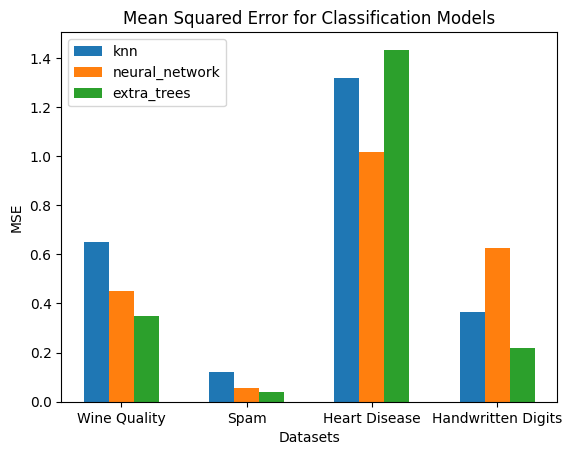

In [15]:
def plot_mse(datasets, title):
    model_names = list(datasets[list(datasets.keys())[0]].keys())
    dataset_names = list(datasets.keys())
    mse_values = []

    for model_name in model_names:
        model_mse = [datasets[dataset_name][model_name]['mse'] for dataset_name in dataset_names]
        mse_values.append(model_mse)

    fig, ax = plt.subplots()
    x = np.arange(len(dataset_names))
    bar_width = 0.2

    for i in range(len(model_names)):
        ax.bar(x + i * bar_width, mse_values[i], width=bar_width, label=model_names[i])

    ax.set_xlabel('Datasets')
    ax.set_ylabel('MSE')
    ax.set_title(title)
    ax.set_xticks(x + bar_width * (len(model_names) - 1) / 2)
    ax.set_xticklabels(dataset_names)
    ax.legend()

    plt.show()

# Use the plot_mse function with the datasets dictionary from the previous code
plot_mse(datasets, 'Mean Squared Error for Classification Models')